In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [191]:
#read train data
df = pd.read_csv('train_store1.csv')
df

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,...,Assortment,CompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenDate,IfCompetition,IfPromo2,IsPromoMonth
0,1,2015-07-31,5263,555,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2524,1,1,0
1,1,2015-07-30,5020,546,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2523,1,1,0
2,1,2015-07-29,4782,523,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2522,1,1,0
3,1,2015-07-28,5011,560,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2521,1,1,0
4,1,2015-07-27,6102,612,1,1,1,1.0,0.0,0.0,...,1,1270.0,0.0,0.0,1.0,0.0,2520,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,2013-05-01,4771,339,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,120,1,1,0
1017205,1115,2013-04-01,4540,326,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,90,1,1,0
1017206,1115,2013-03-01,4297,300,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,59,1,0,1
1017207,1115,2013-02-01,3697,305,1,0,1,1.0,0.0,0.0,...,3,5350.0,0.0,0.0,0.0,1.0,31,1,0,0


In [192]:
df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')

In [193]:
# split the last 6 weeks data as hold-out set (idea from Gert https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
df = df.sort_values(['Date'],ascending = False)
df_total = df.copy()

split_index = 6*7*1115
valid = df[:split_index] 
train = df[split_index:]

# only use data of Sales>0 and Open is 1
valid = valid[(valid.Open != 0)&(valid.Sales >0)]
train = train[(train.Open != 0)&(train.Sales >0)]
df_total = df_total[(df_total.Open != 0)&(df_total.Sales >0)]

In [194]:
df = train

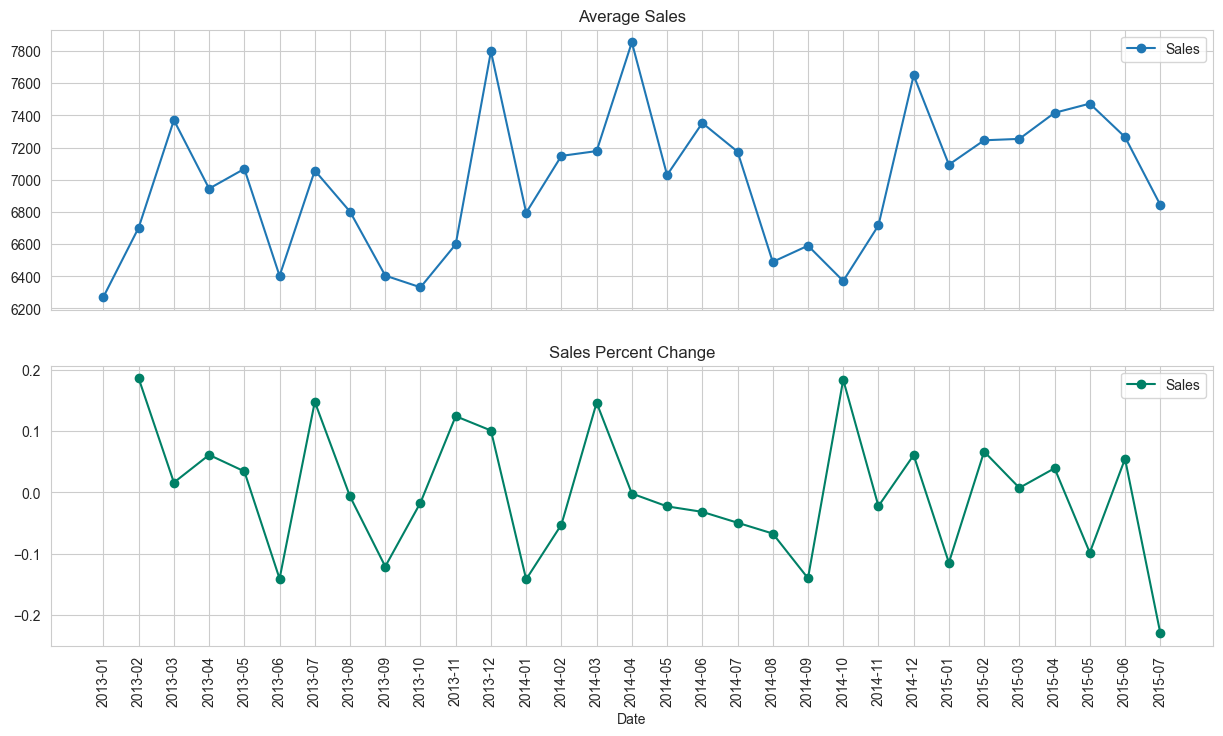

In [195]:
# Date

# Create Year and Month columns
df['Year']  = df['Date'].apply(lambda x: int(str(x)[:4]))
df['Month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
df['Date'] = df['Date'].apply(lambda x: (str(x)[:7]))

# group by date and get average sales, and precent change
AverageSales = df.groupby('Date')["Sales"].mean()
PctChangeSales = df.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = AverageSales.plot(legend=True,grid=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(AverageSales)))
#ax1.set_xticklabels(AverageSales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = PctChangeSales.plot(legend=True,ax=axis2,grid=True,marker='o',rot=90,colormap="summer",title="Sales Percent Change")


Text(0, 0.5, 'Sales')

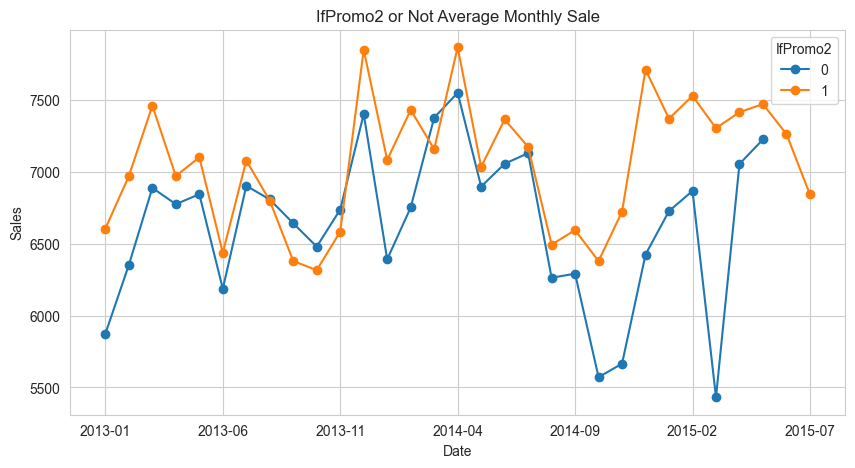

In [185]:
fig, ax = plt.subplots(figsize = (10,5))
df.groupby(['Date', 'IfPromo2']).mean()['Sales'].unstack().plot(ax = ax,legend=True,grid=True,marker='o')
ax.set_title('IfPromo2 or Not Average Monthly Sale')
ax.set_ylabel('Sales')

Text(0.5, 0.98, 'Comparison between IfPromo2 and Store Assortment Type')

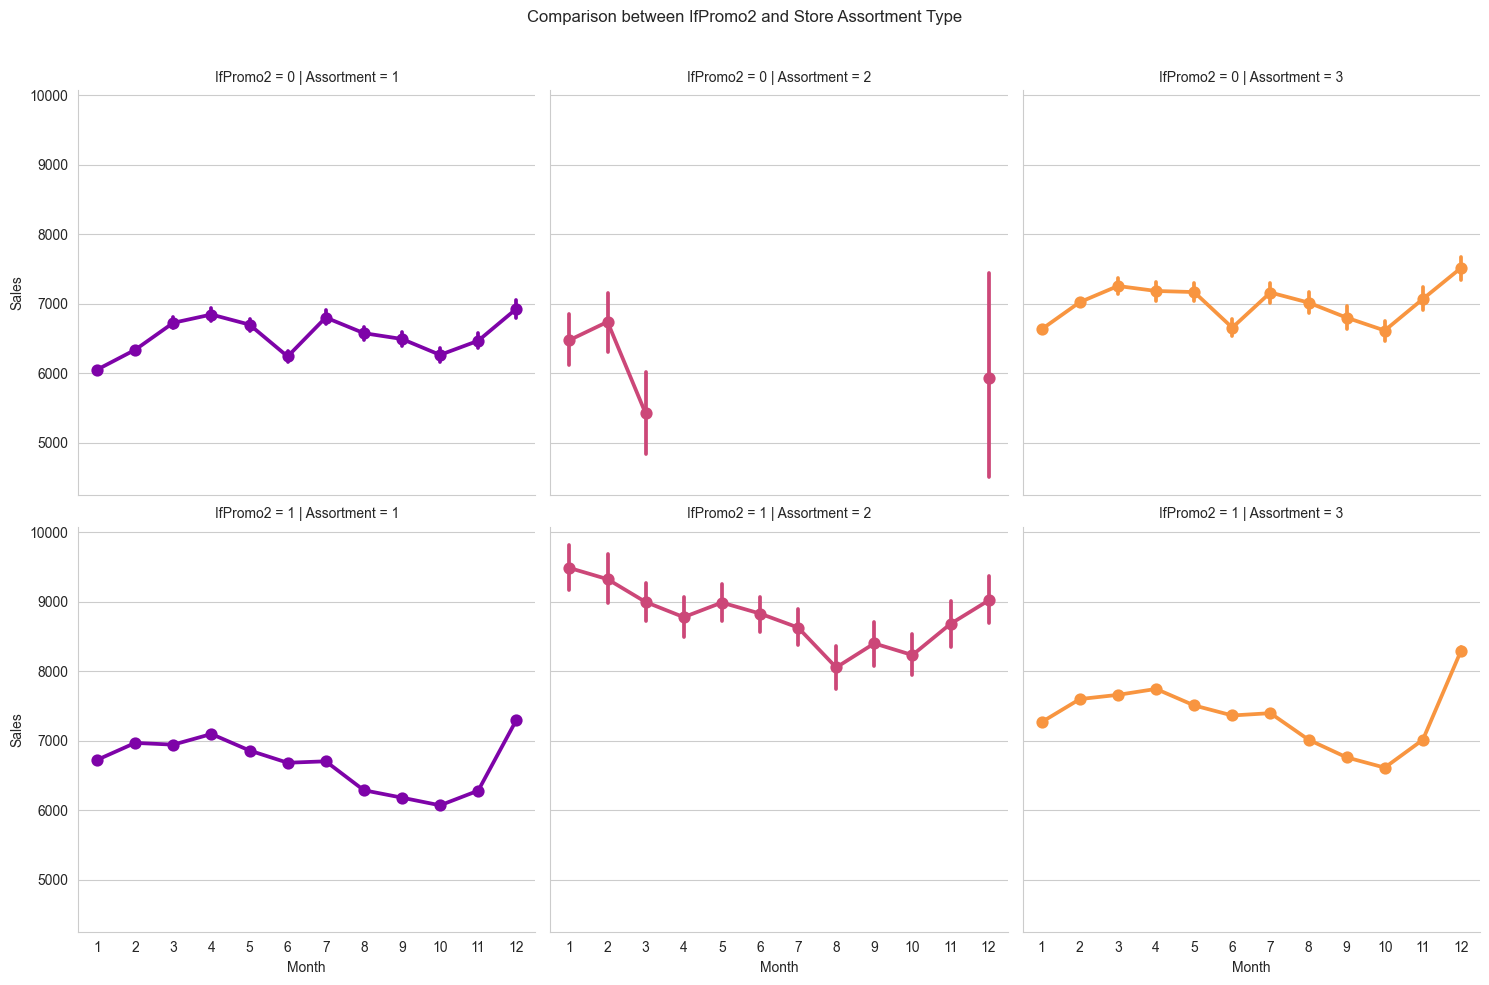

In [186]:
import pickle
import seaborn as sns

c = '#386B7F' # basic color for plots

# sales trends
rp = sns.catplot(data = df, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'Assortment',
               row = 'IfPromo2', 
               kind = 'point',
               color = c) 

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Comparison between IfPromo2 and Store Assortment Type')

Text(0.5, 0.98, 'Comparison between Promo2 and Store Assortment Type')

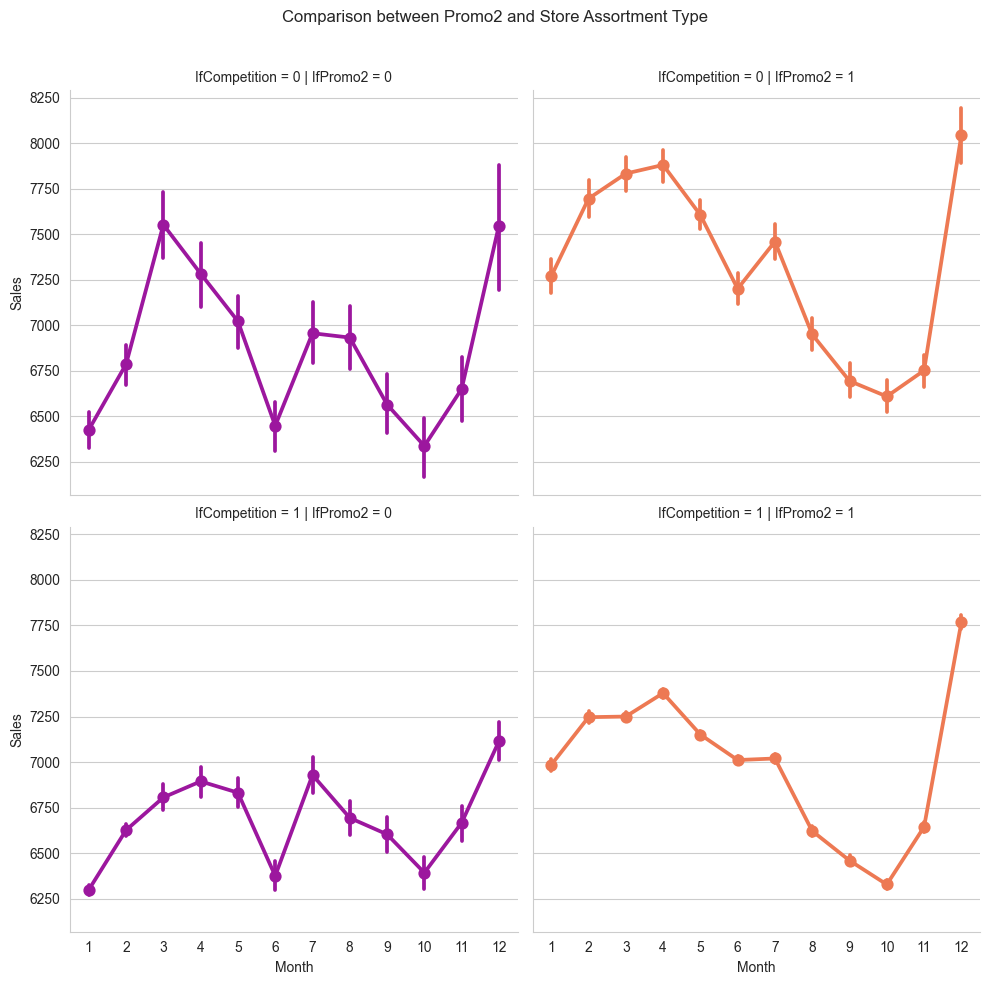

In [187]:
c = '#386B7F' # basic color for plots

# sales trends
rp =sns.catplot(data = df, x = 'Month', y = "Sales", 
               col = 'IfPromo2',
               palette = 'plasma',
               hue = 'IfPromo2',
               row = 'IfCompetition', 
               kind = 'point',
               color = c) 


rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Comparison between Promo2 and Store Assortment Type')


In [164]:
pip install calplot

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: xlabel='Year', ylabel='Customers'>

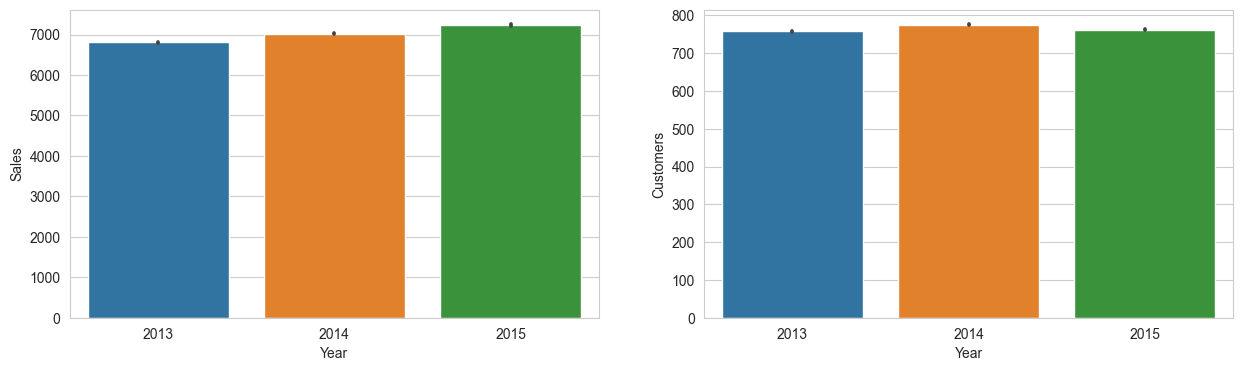

In [165]:
# Plot average sales & customers for every year
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=df, ax=axis1)
sns.barplot(x='Year', y='Customers', data=df, ax=axis2)

In [166]:
# group by date and get average customers, and precent change
average_customers = df.groupby('Date')["Customers"].mean()

# Plot average customers over the time
# it should be correlated with the average sales over time
ax = average_customers.plot(legend=True,marker='o',grid=True, ax=axis2)
ax.set_xticks(range(len(average_customers)))
xlabels = ax.set_xticklabels(average_customers.index.tolist(), rotation=90)

<AxesSubplot: xlabel='Customers', ylabel='Density'>

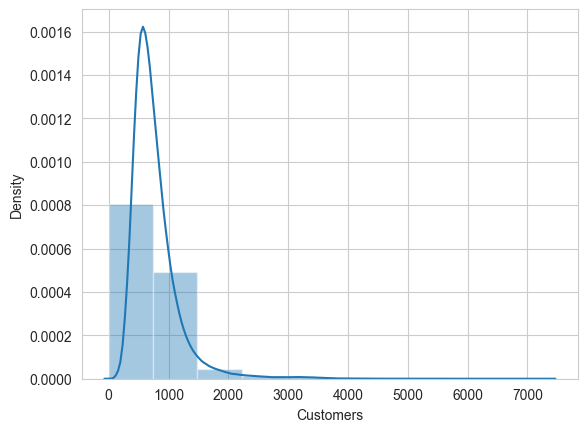

In [167]:
sns.distplot(df["Customers"],bins=10)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805167 entries, 945190 to 238339
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                805167 non-null  int64  
 1   Date                 805167 non-null  object 
 2   Sales                805167 non-null  int64  
 3   Customers            805167 non-null  int64  
 4   Open                 805167 non-null  int64  
 5   Promo                805167 non-null  int64  
 6   SchoolHoliday        805167 non-null  int64  
 7   StateHoliday_0       805167 non-null  float64
 8   StateHoliday_a       805167 non-null  float64
 9   StateHoliday_b       805167 non-null  float64
 10  StateHoliday_c       805167 non-null  float64
 11  Day_1_OfWeek         805167 non-null  float64
 12  Day_2_OfWeek         805167 non-null  float64
 13  Day_3_OfWeek         805167 non-null  float64
 14  Day_4_OfWeek         805167 non-null  float64
 15  Day_5_OfWeek

In [196]:
df1 = df.drop(columns = ['Date','MonthAbb','Customers'])
df1

,Store,Sales,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Day_1_OfWeek,...,Assortment,CompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,CompetitionOpenDate,IfCompetition,IfPromo2,IsPromoMonth
945190,1037,5292,1,0,1,1.0,0.0,0.0,0.0,0.0,...,3,150.0,1.0,0.0,0.0,0.0,934,1,1,0
94089,104,9004,1,0,1,1.0,0.0,0.0,0.0,0.0,...,1,390.0,1.0,0.0,0.0,0.0,2244,1,1,0
115961,128,7111,1,0,0,1.0,0.0,0.0,0.0,0.0,...,3,2000.0,0.0,0.0,0.0,1.0,934,1,1,1
595077,654,5090,1,0,1,1.0,0.0,0.0,0.0,0.0,...,1,6930.0,0.0,0.0,1.0,0.0,3248,1,1,0
272487,301,5562,1,0,1,1.0,0.0,0.0,0.0,0.0,...,3,4510.0,1.0,0.0,0.0,0.0,145,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864127,948,4491,1,0,1,0.0,1.0,0.0,0.0,0.0,...,2,1430.0,0.0,1.0,0.0,0.0,0,1,1,0
321485,353,3139,1,0,1,0.0,1.0,0.0,0.0,0.0,...,2,900.0,0.0,1.0,0.0,0.0,0,1,0,0
249459,274,3102,1,0,1,0.0,1.0,0.0,0.0,0.0,...,2,3640.0,0.0,1.0,0.0,0.0,0,1,0,1
235513,259,6851,1,0,1,0.0,1.0,0.0,0.0,0.0,...,2,210.0,0.0,1.0,0.0,0.0,0,1,1,0


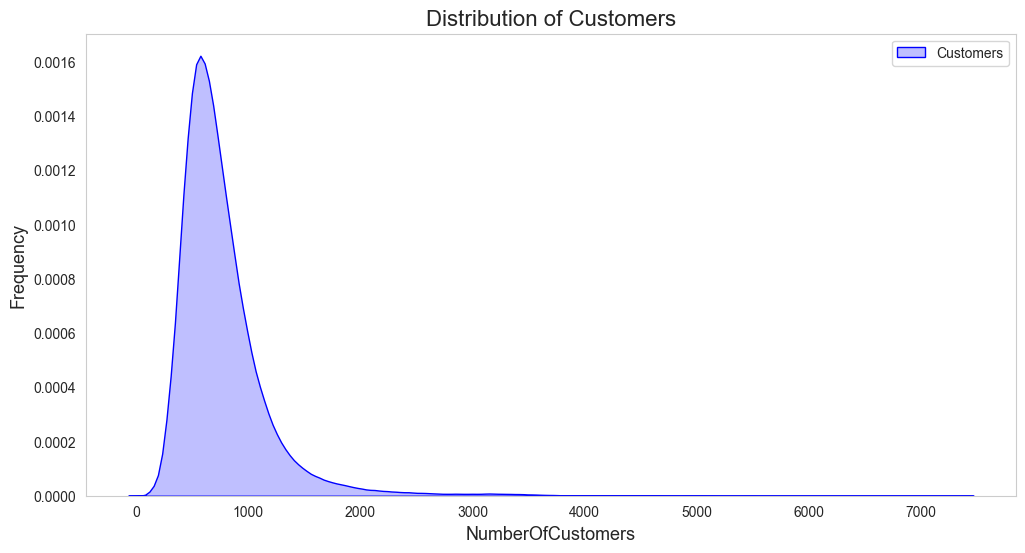

In [170]:
cus = df[df["Customers"] != 0]['Customers']
# KDE
plt.figure(figsize=(12,6))
g = sns.kdeplot(cus, color="Blue", shade = True)
g.set_xlabel("NumberOfCustomers",fontsize=13)
g.set_ylabel("Frequency",fontsize=13)
g.legend(["Customers"])
plt.title('Distribution of Customers',fontsize=16)
plt.grid()
plt.show()

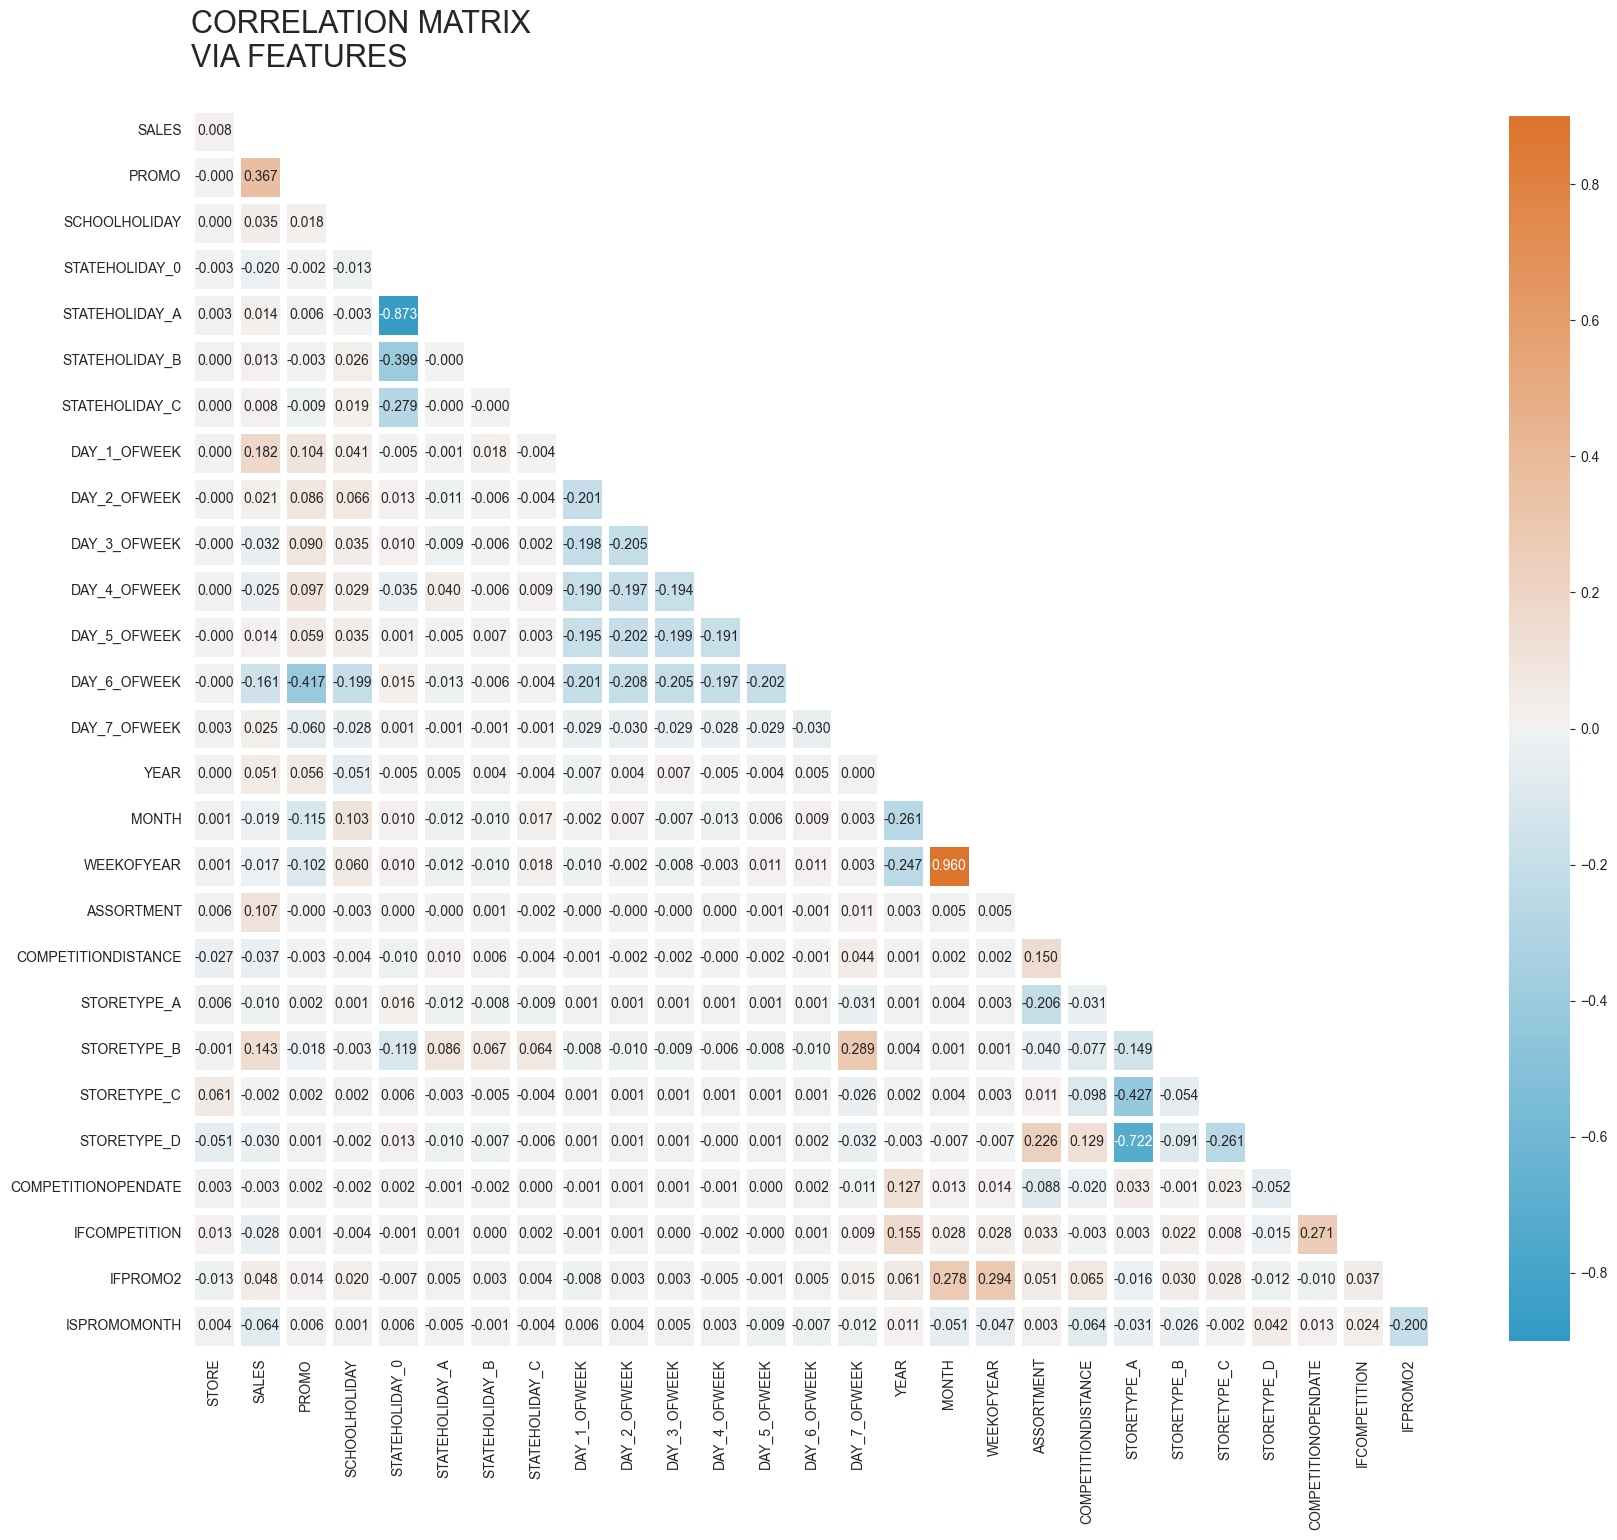

In [197]:
#single corner absolute value after drop columns
task_corr = df1.drop('Open', axis = 1).corr()
fig, ax = plt.subplots(figsize=(20, 30))
# mask
mask = np.triu(np.ones_like(task_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = task_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(230, 30, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".3f", 
           linewidths=5, cmap=cmap, vmin=-0.9, vmax=0.9, 
           cbar_kws={"shrink": .53}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nVIA FEATURES\n'
plt.title(title, loc='left', fontsize=22)
plt.show()


In [172]:
train = train.drop(columns = ['Date','MonthAbb'])
valid = valid.drop(columns = ['Date','MonthAbb'])

In [173]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [174]:
# sort by index
valid.sort_index(inplace = True)
train.sort_index(inplace = True)
df_total.sort_index(inplace = True)

# split x and y
x_train, y_train = train.drop(columns = ['Sales','Customers']), np.log1p(train['Sales'])
x_valid, y_valid = valid.drop(columns = ['Sales','Customers']), np.log1p(valid['Sales'])
x_df_total, y_df_total = df_total.drop(columns = ['Sales','Customers']), np.log1p(df_total['Sales'])

In [152]:
# Loop through each store, 
# train the model using the data of current store, and predict it's sales values.

rossmann_dic = dict(list(train.groupby('Store')))
test_dic     = dict(list(valid.groupby('Store')))
submission   = Series()
scores       = []
score = 0

for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    dif = 0 
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Store"]
    X_test.drop(["Store","Sales"], axis=1,inplace=True)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    Y_pred = lreg.predict(X_test)
    scores.append(lreg.score(X_train, Y_train))
    
    # append predicted values of current store to submission
    submission = submission.append(Series(Y_pred, index=store_ids))


AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
import numpy as np

def rmspe(y_true, y_pred):
    # Calculate the root mean squared percentage error
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

def train_and_predict_by_store(store_data, store_ids, model_fn):
    # Create an empty list to store the RMSPEs for each store
    rmspes = []
    
    # Loop over the stores
    for store_id in store_ids:
        # Get the data for the current store
        store_data_df = store_data[store_data['Store'] == store_id]
        
        # Split the data into training and validation sets
        train_data = store_data_df[store_data_df['Year'] <= 2015]
        val_data = store_data_df[store_data_df['Year'] > 2015]
        
        # Train the model on the training data
        model = model_fn()
        model.fit(train_data[['Store', 'Month', 'DayOfWeek']], train_data['Sales'])
        
        # Make predictions on the validation data
        val_predictions = model.predict(val_data[['Store', 'Month', 'DayOfWeek']])
        
        # Calculate the RMSPE for the current store
        store_rmspe = rmspe(val_data['Sales'], val_predictions)
        rmspes.append(store_rmspe)
        
    # Return the average RMSPE across all stores
    return np.mean(rmspes)


store_ids = train['Store'].unique()
model_fn = lambda: LinearRegression()

average_rmspe = train_and_predict_by_store(store_data, store_ids, model_fn)
print("Average RMSPE:", average_rmspe)